# Pymaceuticals Inc.
---

### Analysis

This analysis compares the performance of various drug regimens against Pymaceuticals' drug of interest, Capomulin. The results of the analysis have led to the following observations:
- Capomulin has the second lowest average tumor volume of 40.675, with Ramicane having the lowest average tumor volume of 40.216. These two drug regimens also have the greatest number of observed timepoints, meaning the development of the tumor for the mice on these two drugs were observed for the longest.
- A further analysis was done on four specific drug regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. A quantitative analysis of the average tumor volume of the mice on these four drug regimens found that none of the regimens had potential outliers in their results, except for Infubinol. Infubinol has one potential outlier, mouse ID c326. 
- A scatter plot shows there is a strong positive correlation of 0.84 between the mouse weight and the average tumor volume of mice being treated with Capomulin. This indicates that mice of a greater weight have a higher average tumor volume. 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID')

# Display the data table for preview
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df[df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = df.loc[df['Mouse ID'] == 'g989']
duplicate_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [2]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df['Mouse ID'] != 'g989', :]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
volume_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
volume_stdev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
volume_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_dict = {'Mean Tumor Volume': mean_volume, 'Median Tumor Volume': median_volume,
                                    'Tumor Volume Variance': volume_variance, 'Tumor Volume Std. Dev.': volume_stdev, 'Tumor Volume Std. Err.': volume_sem}
summary_statistics = pd.DataFrame(summary_dict)
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_statistics = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

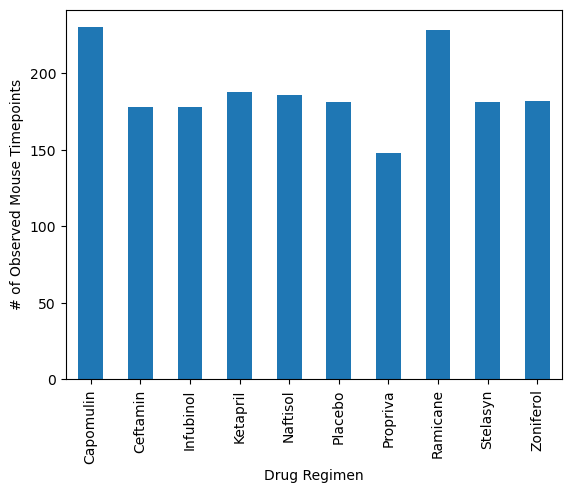

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_by_regimen = clean_df.groupby('Drug Regimen')['Mouse ID'].count()
pd_bar_chart = mice_by_regimen.plot(kind = 'bar')
pd_bar_chart.set_ylabel('# of Observed Mouse Timepoints')

(0.0, 245.0)

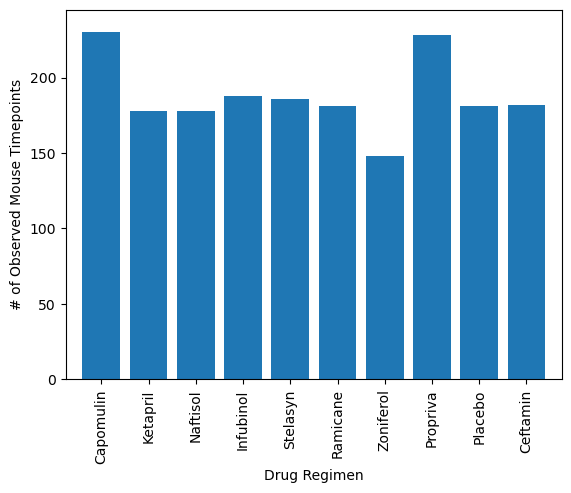

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Set the x and y axis
x_axis = list(clean_df['Drug Regimen'].unique())
y_axis = list(clean_df.groupby('Drug Regimen')['Mouse ID'].count())
#Plot the bar chart
plt.bar(x_axis, y_axis)
#Set the rotation of the x ticks to 90 degrees
plt.xticks(rotation = 90)
#Set axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
#Set axis limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+15)

Text(0, 0.5, 'Sex')

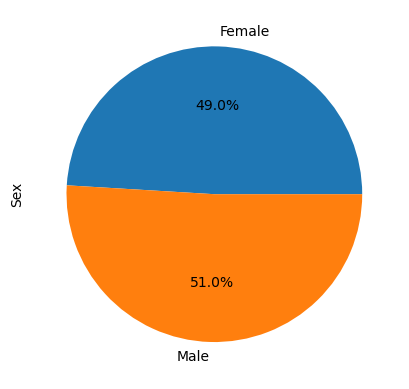

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = clean_df.groupby('Sex')['Mouse ID'].count()
pd_pie = male_v_female.plot(kind = 'pie', autopct = '%1.1f%%')
pd_pie.set_ylabel('Sex')

Text(0, 0.5, 'Sex')

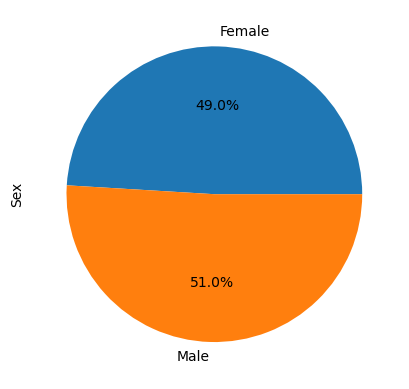

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = list(clean_df.groupby('Sex')['Mouse ID'].count())
labels = list(clean_df['Sex'].unique())
plt.pie(values, labels = labels, autopct = '%1.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [3]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#Merging on Mouse ID and Timepoint columns as those are the columns in the greatest_timepoint_df
#Merging left to only keep data from clean_df that corresponds with the Mouse ID and Timepoint in greatest_timepoint_df (as we only want to see data for each mouse's last timepoint)
greatest_timepoint_volume = pd.merge(greatest_timepoint_df, clean_df, on = ['Mouse ID', 'Timepoint'], how = 'left')
greatest_timepoint_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drugs_df = greatest_timepoint_volume.loc[greatest_timepoint_volume['Drug Regimen'] == drug]
    drugs_df = drugs_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]
    # Determine outliers using upper and lower bounds
    quartiles = drugs_df['Tumor Volume (mm3)'].quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    potential_outliers = drugs_df.loc[(drugs_df['Tumor Volume (mm3)'] > upper_bound) | (drugs_df['Tumor Volume (mm3)'] < lower_bound)]
    if len(potential_outliers) == 0:
        print(f"{drug} has no potential outliers.")
    else:
        print(f"{drug}'s Potential Outliers: {potential_outliers[['Mouse ID', 'Tumor Volume (mm3)']]}")
    tumor_volume.append(drugs_df['Tumor Volume (mm3)'])
 

Capomulin has no potential outliers.
Ramicane has no potential outliers.
Infubinol's Potential Outliers:    Mouse ID  Tumor Volume (mm3)
31     c326           36.321346
Ceftamin has no potential outliers.


([<matplotlib.axis.XTick at 0x16a162710>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

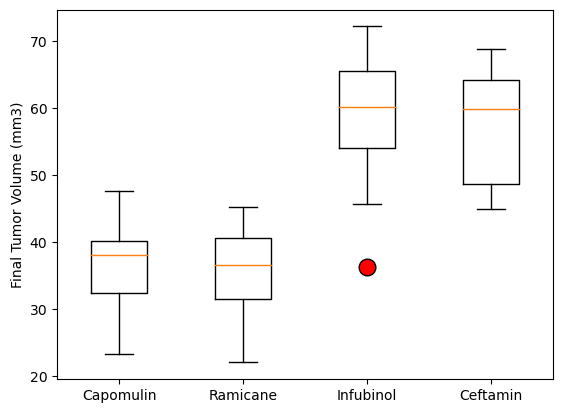

In [10]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker = 'o', markerfacecolor = 'r', markeredgecolor = 'black', markersize = 12)
plt.boxplot(tumor_volume, flierprops = flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], regimens)

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint (days)')

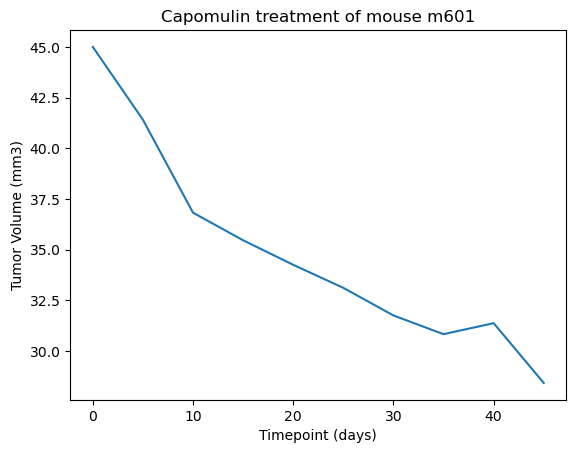

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Get only the mice treated with Capomulin
capomulin_mice = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
#Get data for one mouse treated with Capomulin
mouse = capomulin_mice.loc[capomulin_mice['Mouse ID'] == 'm601'].reset_index()
#Get the ID for the chosen mouse
mouse_id = mouse['Mouse ID'][0]
#Store the drug regimen for the chosen mouse in a variable
mouse_regimen = mouse['Drug Regimen'][0]
#Plot the tumor volume vs time point for the chosen mouse
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.title(f'{mouse_regimen} treatment of mouse {mouse_id}')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')

Text(0.5, 0, 'Weight (g)')

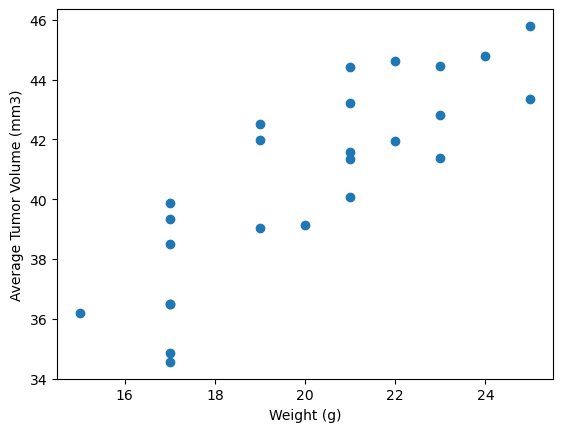

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Get the data for all of the mice treated with Capomulin
capomulin_mice = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
#Get the average tumor volume of the Capomulin mice
avg_tumor_volume = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#Get the average weight of the Capomulin mice
weight = capomulin_mice.groupby('Mouse ID')['Weight (g)'].mean()
#Create the scatter plot and set axis labels
plt.scatter(weight, avg_tumor_volume)
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


Text(0, 0.5, 'Average Tumor Volume (mm3)')

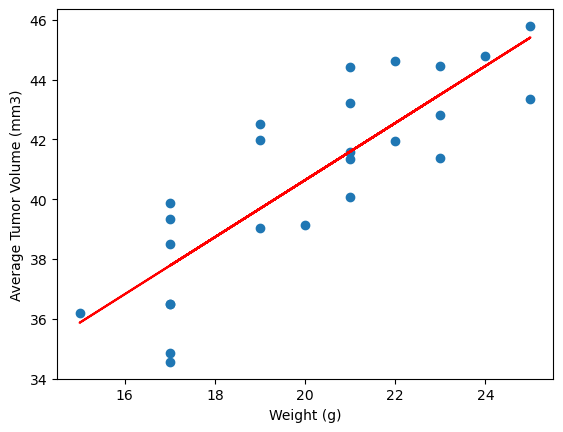

In [51]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
#Correlation coefficient, reusing variables defined in the previous cell
correlation = st.pearsonr(weight, avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")

#Linear regression
#Set the x and y values based on variables defined in the previous cell
x_values = weight
y_values = avg_tumor_volume
#Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the linear regression on top of the scatter plot for mouse weight and average tumor volume
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Annotate the plot and set axis labels
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')